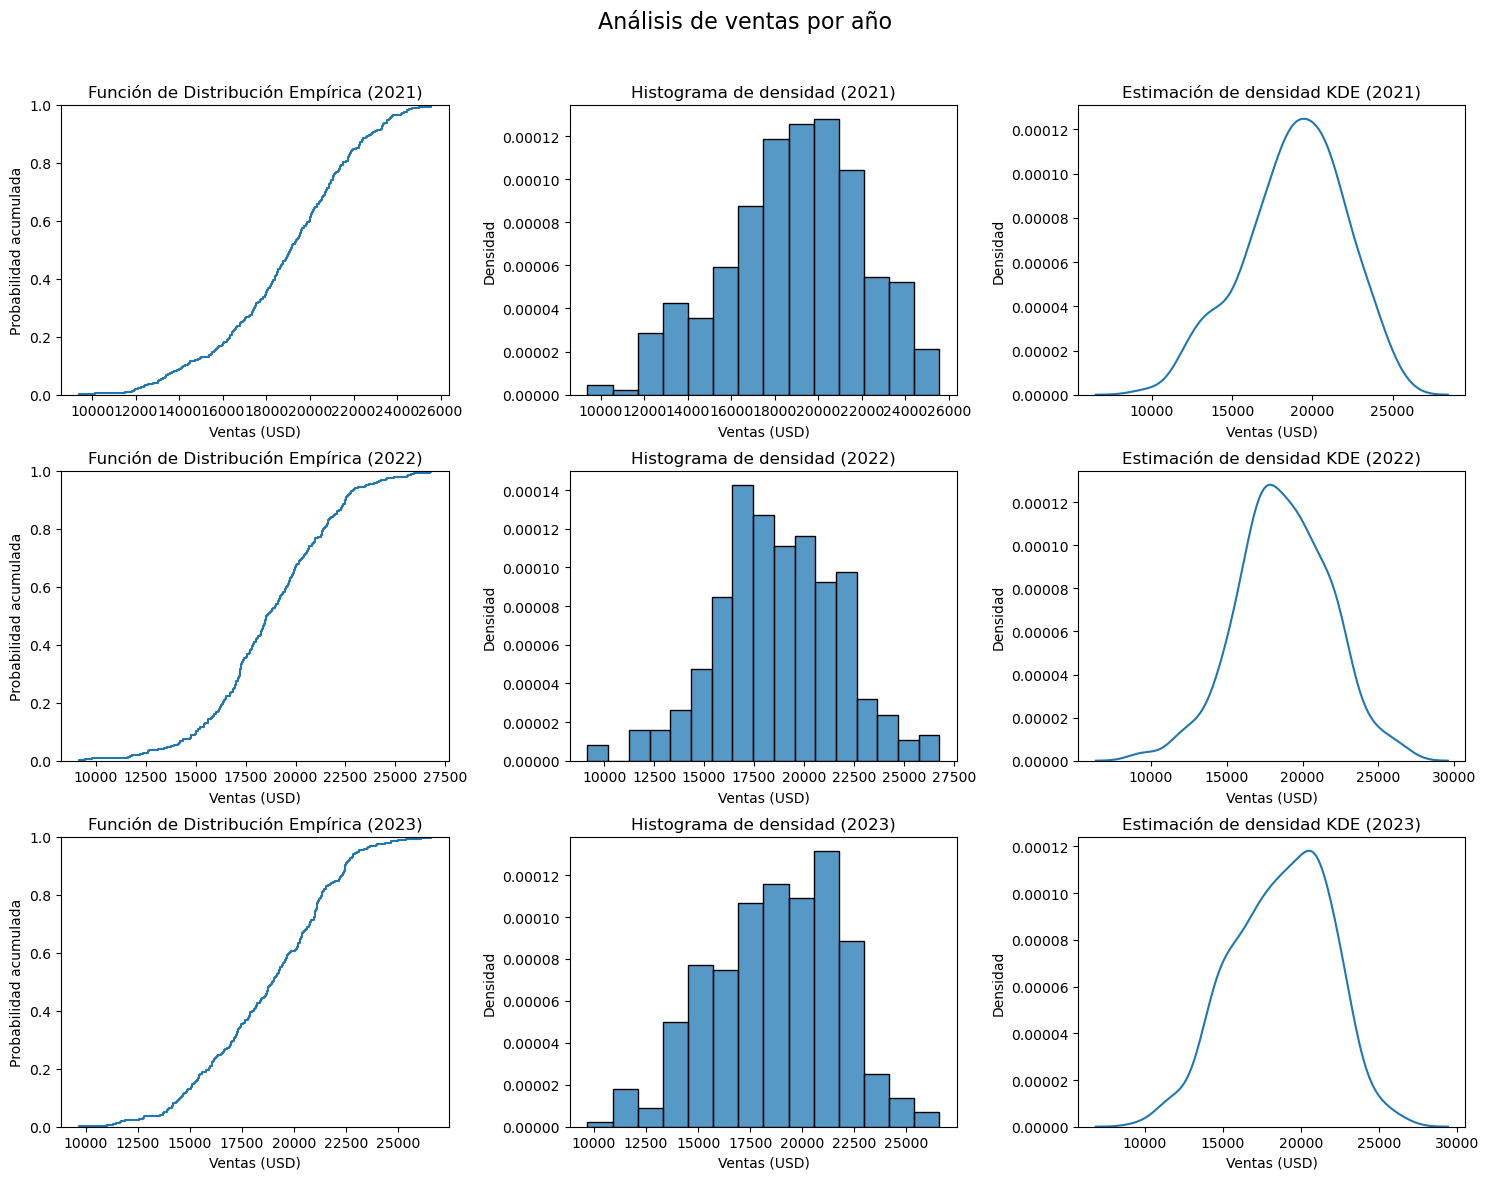

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = r'C:\Users\sebas\OneDrive\Documentos\Maestría\ceia_peia_tp1\Datos_primer_TP_20Co2025_a2004.xlsx'
df_ventas = pd.read_excel(file_path)

# Convertir la columna de fecha a datetime y extraer el año
df_ventas['Fecha'] = pd.to_datetime(df_ventas['Fecha'], format='%d/%m/%Y')
df_ventas['Año'] = df_ventas['Fecha'].dt.year

# Filtrar datos para los años 2021, 2022 y 2023
df_2021 = df_ventas[df_ventas['Año'] == 2021]
df_2022 = df_ventas[df_ventas['Año'] == 2022]
df_2023 = df_ventas[df_ventas['Año'] == 2023]

# Configurar los gráficos
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
plt.suptitle('Análisis de ventas por año', fontsize=16)

# Función para graficar para un año específico
def plot_year(data, year, row):
    ventas = data['Ventas']
    
    # ECDF
    sns.ecdfplot(ventas, ax=axes[row, 0])
    axes[row, 0].set_title(f'Función de Distribución Empírica ({year})')
    axes[row, 0].set_xlabel('Ventas (USD)')
    axes[row, 0].set_ylabel('Probabilidad acumulada')
    
    # Histograma con densidad
    sns.histplot(ventas, stat='density', ax=axes[row, 1])
    axes[row, 1].set_title(f'Histograma de densidad ({year})')
    axes[row, 1].set_xlabel('Ventas (USD)')
    axes[row, 1].set_ylabel('Densidad')
    
    # KDE
    sns.kdeplot(ventas, ax=axes[row, 2])
    axes[row, 2].set_title(f'Estimación de densidad KDE ({year})')
    axes[row, 2].set_xlabel('Ventas (USD)')
    axes[row, 2].set_ylabel('Densidad')

# Graficar para cada año
plot_year(df_2021, 2021, 0)
plot_year(df_2022, 2022, 1)
plot_year(df_2023, 2023, 2)

# Ajustar el layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()